## 프로그램

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
%matplotlib inline
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

## 데이터 불러오기

In [236]:
apart_time = pd.read_csv('time_series.csv', encoding = 'cp949')
apart_time['Date'] = pd.to_datetime(apart_time['Date'])
weight = pd.read_csv('weight.csv',encoding = 'cp949')

# Program

In [ ]:
dong = input('행정동 :')
house = input('단지 :')

time_price = apart_time.query('행정동 == @dong and 단지 == @house and Date < "2020-04-01" ')[['Date','price']].set_index('Date')
time_price.plot(figsize = (15,6))
plt.show()

split_date = pd.Timestamp('12-31-2018')
train_price = time_price.loc[:split_date, ['price']]
test_price = time_price.loc[split_date:, ['price']]

plt.figure(figsize=(15,6))
plt.plot(train_price)
plt.plot(test_price)
plt.legend(['train', 'test'])
plt.show()

# ARIMA 모델 만들기
arima_model = auto_arima(train_price, start_p = 0, d = 1, start_q = 0,
                         max_p = 5, max_d = 5, max_q = 5, start_P = 0,
                         D = 1, start_Q = 0, max_P = 5, max_D = 5,
                         max_Q = 5, m = 12, seasonal = True,
                         error_action = 'warn', trace = True,
                         supress_warnings = True, stepwise = True,
                         random_state = 20, n_fits = 50)

arima_model.summary()

# 시계열 분석을 활용한 예측값
prediction = pd.DataFrame(arima_model.predict(n_periods = len(test_price)),index = test_price.index)
prediction.columns = ['predicted_price']

# 예측값 시각화
plt.figure(figsize = (8,5))
plt.plot(train_price,label = 'Training')
plt.plot(test_price,label = 'Test')
plt.plot(prediction,label = 'Predicted')
plt.legend(loc = 'Left corner')
plt.show()

# 정확도
from sklearn.metrics import r2_score
test_price['predicted_price'] = prediction
r2_score(test_price['price'],test_price['predicted_price'])

행정동 :상계제1동


In [216]:
w = weight.query('행정동 == @dong')

In [228]:
prediction['weight'] = [0.022868,0.022868,0.022868,0.022868,0.022868,0.022868,
                        0.021732,0.021732,0.021732,0.022868,0.022868,0.022868,
                        0.022868,0.022868,0.022868]

In [230]:
prediction['predicted_price_w'] = prediction['predicted_price'] + prediction['predicted_price']*prediction['weight']

In [231]:
prediction

,predicted_price,weight,predicted_price_w
Date,,,
2019-01-01,551.947590,0.022868,564.569528
2019-02-01,562.980363,0.022868,575.854598
2019-03-01,558.710040,0.022868,571.486621
2019-04-01,570.712031,0.022868,583.763073
2019-05-01,562.331928,0.022868,575.191335
2019-06-01,578.703722,0.022868,591.937518
2019-07-01,580.676755,0.021732,593.296022
2019-08-01,579.361314,0.021732,591.951994
2019-09-01,592.136278,0.021732,605.004584


In [233]:
prediction = prediction['predicted_price_w'].reset_index().set_index('Date')

C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'Left corner'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


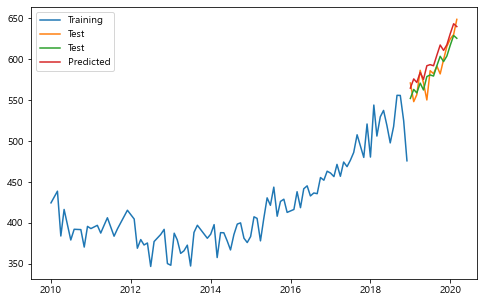

0.6104998831234606

In [234]:
# 예측값 시각화
plt.figure(figsize = (8,5))
plt.plot(train_price,label = 'Training')
plt.plot(test_price,label = 'Test')
plt.plot(prediction,label = 'Predicted')
plt.legend(loc = 'Left corner')
plt.show()

# 정확도
from sklearn.metrics import r2_score
test_price['predicted_price'] = prediction
r2_score(test_price['price'],test_price['predicted_price'])